Michelle Simkins HDS5210 Final Project

The purpose of this project is to assess differences in COVID vaccination rates among different age groups by county and the county's metro status within the state of Missouri. I will also assess if there are any associations between estimated COVID vaccine hesitancy with the most recent cummulative COVID vaccination rates. I will be using data from healthdata.gov to capture COVID-19 county-level COVID vaccine rates, which are current as of 5/9/22.  For the purposes of this project, I will be using variables that measure age group specific completed series vaccinatin rates. I will connect this with another dataset from healthdta.gov that includes COVID vaccine hesitancy rates at the county-level based on the U.S. Censsu Bureau's Household Pulse Survey (HPS). Finally, I will connect this county-level data wtih the Vintage 2019 census data for Missouri in order to calculate vaccination rates normalized to the population per county. This analysis can provide insights into differences in COVID vaccine update in different counties and metro areas and help guide policies to improve COVID vaccination rates. 

In [2]:
#Import data sets
#COVID19 vaccination data from healthdata.gov (https://healthdata.gov/dataset/COVID-19-Vaccinations-in-the-United-States-County/ipdn-uaih)
#COVID19 vaccination hesitancy estimates from healthdadta.gov (https://healthdata.gov/dataset/Vaccine-Hesitancy-for-COVID-19-County-and-local-es/pu4g-5454)
#2019 Missouri Census estimates by county (https://healthdata.gov/dataset/Vaccine-Hesitancy-for-COVID-19-County-and-local-es/pu4g-5454)
import pandas as pd
import matplotlib.pyplot as plt

COVID_vax_data = pd.read_csv('/home/jupyter-msimkins7/hds5210-2022/Final_Project/COVID-19_Vaccinations_in_the_United_States_County_5.7.22.csv')
vax_hesitancy_data = pd.read_csv('/home/jupyter-msimkins7/hds5210-2022/Final_Project/Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv')
census_2019_data = pd.read_csv('/home/jupyter-msimkins7/hds5210-2022/Final_Project/Census_2019.csv')

In [3]:
#explore the data sets
COVID_vax_data.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,05/09/2022,02090,19,Fairbanks North Star Borough,AK,97.5,66162.0,68.3,66136.0,73.8,...,2.0,2.0,2.0,3.0,96849.0,89670.0,15825.0,80563.0,73845.0,10828.0
1,05/09/2022,04017,19,Navajo County,AZ,97.7,102981.0,92.8,102959.0,95.0,...,7.0,7.0,8.0,7.0,110924.0,103477.0,21673.0,91873.0,81804.0,20829.0
2,05/09/2022,06043,19,Mariposa County,CA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17203.0,16474.0,2049.0,15399.0,14425.0,4974.0
3,05/09/2022,06095,19,Solano County,CA,97.6,350697.0,78.3,350366.0,83.3,...,3.0,4.0,4.0,3.0,447643.0,420851.0,71664.0,382258.0,349187.0,73156.0
4,05/09/2022,09015,19,Windham County,CT,98.3,86736.0,74.3,86696.0,78.1,...,4.0,4.0,4.0,3.0,116782.0,110995.0,17220.0,102156.0,93775.0,20033.0


In [4]:
vax_hesitancy_data.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,0.0242,0.0022,0.0036,0.2697,0.0000,0.6887,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.841259 33.104456, -85.8409...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,...,0.0229,0.0043,0.0061,0.3237,0.0003,0.6263,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-86.303069 33.46316, -86.30306...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,...,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,...,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,1133,"Winston County, Alabama",ALABAMA,0.1805,0.2313,0.1379,0.70,High Vulnerability,0.80,High Concern,...,0.0315,0.0034,0.0016,0.0073,0.0005,0.9370,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.63656399999999 34.120908, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."


In [5]:
census_2019_data.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,29,1,Missouri,Adair County,1,0,25607,12204,13403,...,242,255,9,17,15,13,4,3,2,5
1,50,29,1,Missouri,Adair County,1,1,1438,759,679,...,30,18,3,3,2,0,1,2,1,3
2,50,29,1,Missouri,Adair County,1,2,1338,716,622,...,13,17,1,4,1,1,0,0,0,0
3,50,29,1,Missouri,Adair County,1,3,1317,670,647,...,9,18,0,1,1,1,0,0,0,0
4,50,29,1,Missouri,Adair County,1,4,2999,1379,1620,...,40,50,1,5,6,4,1,0,0,1


In [6]:
#get Missouri only COVID vax data 
MO_vax_data = COVID_vax_data['Recip_State'] == "MO"

In [7]:
#get most recent COVID vax data
Most_recent_vax = (COVID_vax_data['Date']=='05/09/2022')

In [8]:
#create new dataframe with only MO and most recent COVID vax data
MO_COVID_vax_data = COVID_vax_data[MO_vax_data & Most_recent_vax]

In [9]:
#explore new MO COVID vax data
MO_COVID_vax_data.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
26,05/09/2022,29203,19,Shannon County,MO,91.3,2737.0,33.5,2737.0,35.5,...,7.0,7.0,7.0,7.0,8166.0,7714.0,1290.0,7025.0,6424.0,1848.0
27,05/09/2022,29209,19,Stone County,MO,91.3,13765.0,43.1,13765.0,44.9,...,8.0,8.0,8.0,7.0,31952.0,30674.0,3957.0,28691.0,26717.0,10098.0
28,05/09/2022,29215,19,Texas County,MO,91.3,9517.0,37.5,9517.0,39.7,...,7.0,7.0,7.0,6.0,25398.0,23968.0,3972.0,21867.0,19996.0,5456.0
79,05/09/2022,29075,19,Gentry County,MO,91.3,3237.0,49.3,3237.0,53.1,...,7.0,7.0,7.0,6.0,6571.0,6099.0,1175.0,5435.0,4924.0,1307.0
214,05/09/2022,29033,19,Carroll County,MO,91.3,4747.0,54.7,4747.0,57.7,...,7.0,7.0,7.0,6.0,8679.0,8233.0,1510.0,7433.0,6723.0,1917.0


In [10]:
#get Missouri vax hesitancy estimates
filter= vax_hesitancy_data['State']=='MISSOURI'

In [11]:
MO_vax_hesitancy = vax_hesitancy_data[filter]

In [12]:
MO_vax_hesitancy[['County', 'State']] = MO_vax_hesitancy['County Name'].str.split(',', expand=True)
# display the dataframe
MO_vax_hesitancy.head()

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary,County
1524,29019,"Boone County, Missouri",Missouri,0.1173,0.1721,0.0678,0.29,Low Vulnerability,0.49,Moderate Concern,...,0.0028,0.0443,0.0897,0.0007,0.7888,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-92.475415 39.162997, -92.4593...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",Boone County
1528,29011,"Barton County, Missouri",Missouri,0.1576,0.2180,0.0958,0.60,Moderate Vulnerability,0.79,High Concern,...,0.0237,0.0003,0.0030,0.0008,0.9244,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-94.617088 37.477776, -94.6170...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",Barton County
1553,29001,"Adair County, Missouri",Missouri,0.1464,0.2059,0.0878,0.45,Moderate Vulnerability,0.66,High Concern,...,0.0011,0.0240,0.0268,0.0022,0.8983,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-92.62919 40.343679, -92.62538...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",Adair County
1566,29009,"Barry County, Missouri",Missouri,0.1430,0.1978,0.0863,0.71,High Vulnerability,0.84,Very High Concern,...,0.0059,0.0128,0.0023,0.0000,0.8563,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-94.06577999999999 36.812925, ...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",Barry County
1573,29017,"Bollinger County, Missouri",Missouri,0.1434,0.2029,0.0858,0.48,Moderate Vulnerability,0.75,High Concern,...,0.0086,0.0036,0.0041,0.0000,0.9599,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-90.14540000000001 37.342433, ...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",Bollinger County


In [13]:
#get census data from 2019 by county based on codebook (https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/cc-est2019-alldata.pdf)
census_2019= census_2019_data['YEAR'] == 12

In [14]:
census_by_age_grp = census_2019_data['AGEGRP'] != 0

In [15]:
census_19 = census_2019_data[census_2019 & census_by_age_grp]

In [16]:
#pivot and aggregate data to get total population by county
# The dataset actually includes a total population (AGEGRP =0), but you can get the same total population by aggregating all of the age group  populations)
import numpy as np

census_19_county = census_19.pivot_table(
    values = 'TOT_POP',
    index ='CTYNAME',
    aggfunc = np.ma.sum,
    fill_value=0)

In [17]:
census_19_county.reset_index(inplace=True)

In [18]:
census_19_county

,CTYNAME,TOT_POP
0,Adair County,25343
1,Andrew County,17712
2,Atchison County,5143
3,Audrain County,25388
4,Barry County,35789
...,...,...
110,Washington County,24730
111,Wayne County,12873
112,Webster County,39592
113,Worth County,2013


In [19]:
#check all county names before mergin datasets by county
county_list_vax = MO_COVID_vax_data['Recip_County'].tolist()
county_list_hesitant = MO_vax_hesitancy['County'].tolist()
county_list_census= census_19_county['CTYNAME'].tolist()

In [20]:
county_list_vax

['Shannon County',
 'Stone County',
 'Texas County',
 'Gentry County',
 'Carroll County',
 'Gasconade County',
 'Miller County',
 'Ozark County',
 'Vernon County',
 'Howell County',
 'Benton County',
 'Franklin County',
 'Harrison County',
 'Monroe County',
 'St. Charles County',
 'Worth County',
 'Jackson County',
 'Knox County',
 'Mercer County',
 'Montgomery County',
 'New Madrid County',
 'Wayne County',
 'Andrew County',
 'Dallas County',
 'Maries County',
 'Clay County',
 'Grundy County',
 'Stoddard County',
 'Jefferson County',
 'Buchanan County',
 'Dunklin County',
 'Howard County',
 'Moniteau County',
 'Crawford County',
 'Oregon County',
 'Pulaski County',
 'Ray County',
 'Warren County',
 'Lawrence County',
 'Platte County',
 'St. Clair County',
 'McDonald County',
 'Morgan County',
 'Taney County',
 'Boone County',
 'Laclede County',
 'Randolph County',
 'Perry County',
 'Atchison County',
 'Cass County',
 'Mississippi County',
 'Ripley County',
 'Dent County',
 'Hickory Co

In [21]:
county_list_hesitant

['Boone County',
 'Barton County',
 'Adair County',
 'Barry County',
 'Bollinger County',
 'Andrew County',
 'Butler County',
 'Benton County',
 'Atchison County',
 'Caldwell County',
 'Buchanan County',
 'Bates County',
 'Callaway County',
 'Audrain County',
 'Polk County',
 'Camden County',
 'Stoddard County',
 'Cedar County',
 'Clinton County',
 'Morgan County',
 'Lincoln County',
 'Greene County',
 'Knox County',
 'Grundy County',
 'Mississippi County',
 'Dade County',
 'Dunklin County',
 'Macon County',
 'Vernon County',
 'New Madrid County',
 'St. Clair County',
 'Holt County',
 'Scotland County',
 'Osage County',
 'Stone County',
 'Cape Girardeau County',
 'Ray County',
 'Chariton County',
 'Oregon County',
 'Scott County',
 'Hickory County',
 'Laclede County',
 'Pulaski County',
 'Franklin County',
 'Jackson County',
 'Texas County',
 'Pettis County',
 'Webster County',
 'Clay County',
 'Moniteau County',
 'St. Charles County',
 'Wayne County',
 'Crawford County',
 'Lewis Count

In [22]:
county_list_census

['Adair County',
 'Andrew County',
 'Atchison County',
 'Audrain County',
 'Barry County',
 'Barton County',
 'Bates County',
 'Benton County',
 'Bollinger County',
 'Boone County',
 'Buchanan County',
 'Butler County',
 'Caldwell County',
 'Callaway County',
 'Camden County',
 'Cape Girardeau County',
 'Carroll County',
 'Carter County',
 'Cass County',
 'Cedar County',
 'Chariton County',
 'Christian County',
 'Clark County',
 'Clay County',
 'Clinton County',
 'Cole County',
 'Cooper County',
 'Crawford County',
 'Dade County',
 'Dallas County',
 'Daviess County',
 'DeKalb County',
 'Dent County',
 'Douglas County',
 'Dunklin County',
 'Franklin County',
 'Gasconade County',
 'Gentry County',
 'Greene County',
 'Grundy County',
 'Harrison County',
 'Henry County',
 'Hickory County',
 'Holt County',
 'Howard County',
 'Howell County',
 'Iron County',
 'Jackson County',
 'Jasper County',
 'Jefferson County',
 'Johnson County',
 'Knox County',
 'Laclede County',
 'Lafayette County',
 '

In [23]:
#reformat county names to uper case to ensure all cases types match up before merging
MO_COVID_vax_data['Recip_County']= MO_COVID_vax_data['Recip_County'].str.upper()
MO_vax_hesitancy['County']= MO_vax_hesitancy['County'].str.upper()
census_19_county['CTYNAME']= census_19_county['CTYNAME'].str.upper()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
#Merge COVID vax and census data 
covid_vax_census = pd.merge(MO_COVID_vax_data,census_19_county, left_on='Recip_County', right_on = 'CTYNAME', how='right')

In [60]:
#Merge covid vax & census data with vax hesitancy
covid_final = pd.merge(covid_vax_census,MO_vax_hesitancy, left_on='Recip_County', right_on = 'County', how='left')

In [61]:
#check new dataframe
covid_final.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary,County
0,05/09/2022,29001,19,ADAIR COUNTY,MO,91.3,13431.0,53.0,13430.0,55.9,...,0.0011,0.0240,0.0268,0.0022,0.8983,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-92.62919 40.343679, -92.62538...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",ADAIR COUNTY
1,05/09/2022,29003,19,ANDREW COUNTY,MO,91.3,7738.0,43.7,7738.0,46.4,...,0.0026,0.0019,0.0137,0.0000,0.9448,POINT (-92.477244 38.3675),MO,MULTIPOLYGON (((-94.78497899999999 40.12701699...,"MULTIPOLYGON (((-94.60803299999999 38.847207, ...",ANDREW COUNTY
2,05/09/2022,29005,19,ATCHISON COUNTY,MO,91.3,3346.0,65.1,3346.0,68.4,...,0.0078,0.0048,0.0046,0.0000,0.9656,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-95.654879 40.527311999999995,...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",ATCHISON COUNTY
3,05/09/2022,29007,19,AUDRAIN COUNTY,MO,91.3,11036.0,43.5,11036.0,46.3,...,0.0023,0.0013,0.0571,0.0009,0.8666,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-91.97645299999999 39.062044, ...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",AUDRAIN COUNTY
4,05/09/2022,29009,19,BARRY COUNTY,MO,91.3,18965.0,53.0,18964.0,56.4,...,0.0059,0.0128,0.0023,0.0000,0.8563,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-94.06577999999999 36.812925, ...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",BARRY COUNTY


In [62]:
covid_final.columns

Index(['Date', 'FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_Pct', 'Series_Complete_5Plus',
       'Series_Complete_5PlusPop_Pct', 'Series_Complete_5to17',
       'Series_Complete_5to17Pop_Pct', 'Series_Complete_12Plus',
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65Plus',
       'Series_Complete_65PlusPop_Pct', 'Booster_Doses',
       'Booster_Doses_Vax_Pct', 'Booster_Doses_12Plus',
       'Booster_Doses_12Plus_V

In [63]:
#function to get vax rates by age groups: 5+, 5-17
def covid_vax_rate_age(age_grp, vax_age, census_age):
    """(str, float, float) -> float
    This function takes the age group completed vax count, the age group census population and calculate the age group specific COVID vax rate per 
    1,000 population.  It also creates a new column name with the age group
    
    >>> 
    if covid_final['County']=="ADAIR COUNTY":
        covid_vax_rate_age([5_plus_vax_rate', covid_final['Series_Complete_5Plus'], covid_final['Census2019_5PlusPop'])
        484.356798
    
    
    """
    covid_final['vax_rate_by_age']= (vax_age/census_age)*1000
    covid_final.rename(columns = {'vax_rate_by_age':age_grp}, inplace = True)

In [64]:
covid_vax_rate_age('5_plus_vax_rate', covid_final['Series_Complete_5Plus'], covid_final['Census2019_5PlusPop'])
covid_vax_rate_age('5_to_17_vax_rate', covid_final['Series_Complete_5to17'], covid_final['Census2019_5to17Pop'])
covid_vax_rate_age('12_plus_vax_rate', covid_final['Series_Complete_12Plus'], covid_final['Census2019_12PlusPop'])
covid_vax_rate_age('18_plus_vax_rate', covid_final['Series_Complete_18Plus'], covid_final['Census2019_18PlusPop'])
covid_vax_rate_age('65_plus_vax_rate', covid_final['Series_Complete_65Plus'], covid_final['Census2019_65PlusPop'])

In [65]:
#check new columns
covid_final.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Geographical Point,State Code,County Boundary,State Boundary,County,5_plus_vax_rate,5_to_17_vax_rate,12_plus_vax_rate,18_plus_vax_rate,65_plus_vax_rate
0,05/09/2022,29001,19,ADAIR COUNTY,MO,91.3,13431.0,53.0,13430.0,55.9,...,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-92.62919 40.343679, -92.62538...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",ADAIR COUNTY,484.356798,227.765727,508.887103,524.148205,793.940977
1,05/09/2022,29003,19,ANDREW COUNTY,MO,91.3,7738.0,43.7,7738.0,46.4,...,POINT (-92.477244 38.3675),MO,MULTIPOLYGON (((-94.78497899999999 40.12701699...,"MULTIPOLYGON (((-94.60803299999999 38.847207, ...",ANDREW COUNTY,407.454012,139.986825,443.264059,466.930345,596.097845
2,05/09/2022,29005,19,ATCHISON COUNTY,MO,91.3,3346.0,65.1,3346.0,68.4,...,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-95.654879 40.527311999999995,...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",ATCHISON COUNTY,590.026569,210.927573,633.846841,662.688748,826.022305
3,05/09/2022,29007,19,AUDRAIN COUNTY,MO,91.3,11036.0,43.5,11036.0,46.3,...,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-91.97645299999999 39.062044, ...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",AUDRAIN COUNTY,405.467831,141.099855,437.339095,461.202075,740.852998
4,05/09/2022,29009,19,BARRY COUNTY,MO,91.3,18965.0,53.0,18964.0,56.4,...,POINT (-92.477244 38.3675),MO,"MULTIPOLYGON (((-94.06577999999999 36.812925, ...","MULTIPOLYGON (((-94.60803299999999 38.847207, ...",BARRY COUNTY,473.853197,173.404611,514.659583,538.895519,715.804865


In [66]:
import doctest
doctest.run_docstring_examples(covid_vax_rate_age, globals(), verbose=True)

Finding tests in NoName


In [67]:
#convert vax hesitancy to a percent
covid_final['Estimated hesitant']= covid_final['Estimated hesitant']*100

In [68]:
#check reformating of covid vax estimated hesitant:
covid_final['Estimated hesitant']

0      14.64
1      15.45
2      14.82
3      15.39
4      14.30
       ...  
110    16.38
111    16.66
112    14.25
113    14.82
114    16.46
Name: Estimated hesitant, Length: 115, dtype: float64

In [70]:
#keep only relevant columns
covid_final = covid_final[['County', 'Metro_status','5_plus_vax_rate', '5_to_17_vax_rate','12_plus_vax_rate','18_plus_vax_rate','65_plus_vax_rate','Series_Complete_18PlusPop_Pct','Estimated hesitant']]

In [71]:
covid_final

,County,Metro_status,5_plus_vax_rate,5_to_17_vax_rate,12_plus_vax_rate,18_plus_vax_rate,65_plus_vax_rate,Series_Complete_18PlusPop_Pct,Estimated hesitant
0,ADAIR COUNTY,Non-metro,484.356798,227.765727,508.887103,524.148205,793.940977,52.4,14.64
1,ANDREW COUNTY,Metro,407.454012,139.986825,443.264059,466.930345,596.097845,46.7,15.45
2,ATCHISON COUNTY,Non-metro,590.026569,210.927573,633.846841,662.688748,826.022305,66.3,14.82
3,AUDRAIN COUNTY,Non-metro,405.467831,141.099855,437.339095,461.202075,740.852998,46.1,15.39
4,BARRY COUNTY,Non-metro,473.853197,173.404611,514.659583,538.895519,715.804865,53.9,14.30
...,...,...,...,...,...,...,...,...,...
110,WASHINGTON COUNTY,Non-metro,339.740015,99.569172,369.704992,392.190685,527.439024,39.2,16.38
111,WAYNE COUNTY,Non-metro,383.375603,79.510703,416.412829,441.477439,641.009262,44.1,16.66
112,WEBSTER COUNTY,Metro,458.668558,144.192083,509.553944,542.331331,807.031626,54.2,14.25
113,WORTH COUNTY,Non-metro,433.281005,75.342466,470.017133,497.838172,708.812261,49.8,14.82


In [72]:
#count number of counties that are metro vs. non-metro

by_metro_status = covid_final.groupby(['Metro_status'])['County'].count().reset_index()

The majority of counties in Missouri are non-metro

In [74]:
#Get bar plot of vaccination rates by county for 65+ 
covid_final.sort_values(by='65_plus_vax_rate',inplace=True, ascending=False)

# Define a dictionary mapping variable values to colurs:
colors = {"Metro": "#273c75", "Non-metro": "#44bd32"}

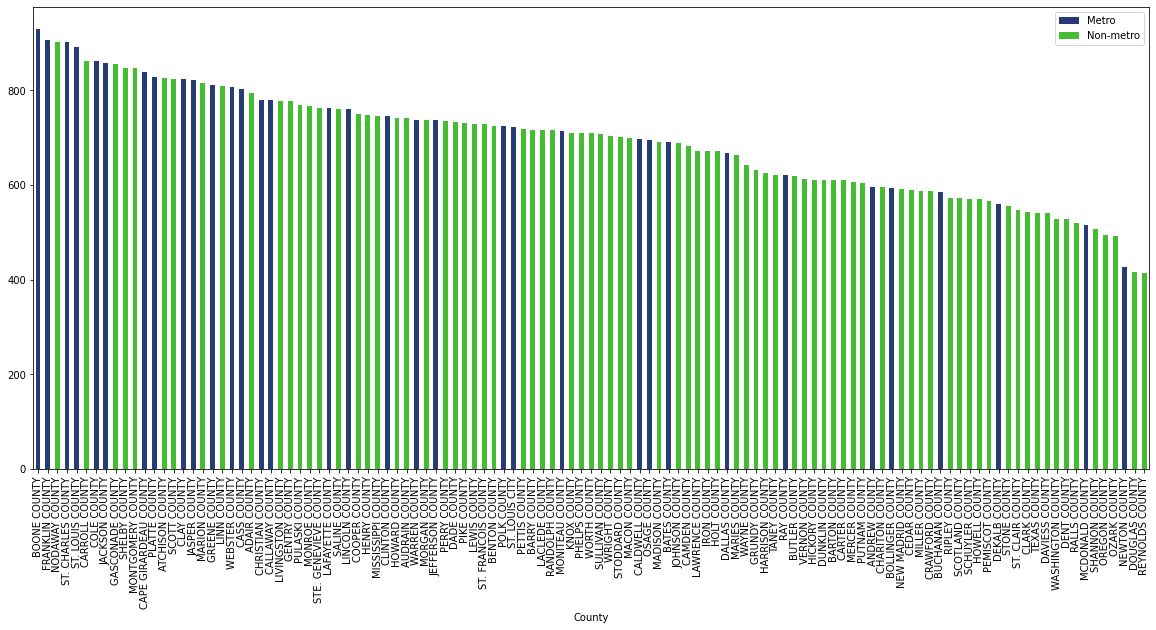

In [75]:
from matplotlib.patches import Patch

county_vax_rate_65 = covid_final.plot.bar(x='County', y = '65_plus_vax_rate', color=covid_final['Metro_status'].replace(colors), figsize=(20,8.5)).legend(
    [
        Patch(facecolor=colors['Metro']),
        Patch(facecolor=colors['Non-metro'])
    ], ["Metro", "Non-metro"]
)

In [76]:
#Get bar plot of vaccination rates by county for 18+ 
covid_final.sort_values(by='18_plus_vax_rate',inplace=True, ascending=False)

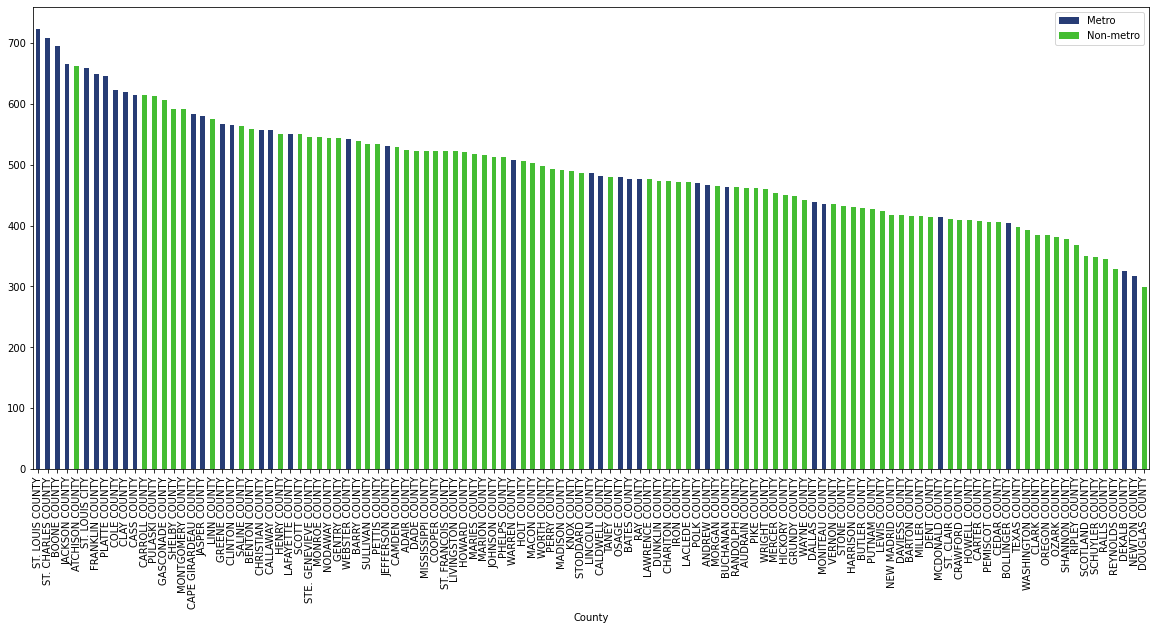

In [77]:
county_vax_rate_18 = covid_final.plot.bar(x='County', y = '18_plus_vax_rate', color=covid_final['Metro_status'].replace(colors), figsize=(20,8.5)).legend(
    [
        Patch(facecolor=colors['Metro']),
        Patch(facecolor=colors['Non-metro'])
    ], ["Metro", "Non-metro"]
)

It's interesting to note that when you look at the completed COVID vaccination rate for 65+ and 18+ by county with the bars color-coded by Metro status, there is a cluster of Metro counties with the highest vaccination rates.  This is most noteable for the 18+ vaccination rates, which is in-line with trends we've seen throughout the pandemic. 

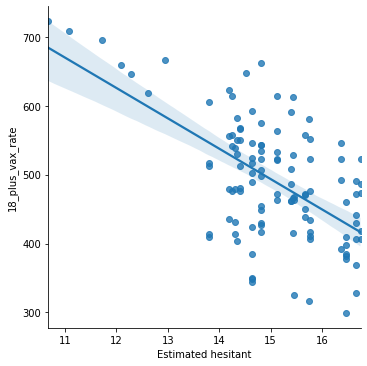

In [88]:
#scatter plot of estimated vaccine hesitancy vs. 18+ vaccination rate
import seaborn as sns
sns.lmplot(x="Estimated hesitant", y="18_plus_vax_rate", data=covid_final);

In [89]:
from scipy import stats
stats.pearsonr(covid_final['Estimated hesitant'], covid_final['18_plus_vax_rate'])

(-0.5893599451534592, 4.23496062982029e-12)

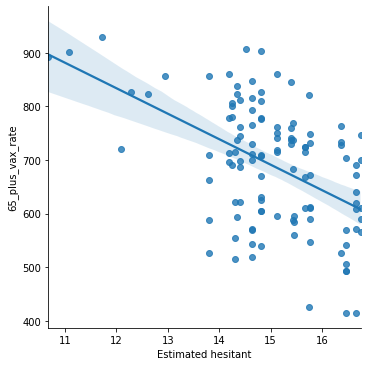

In [90]:
#scatter plot of estimated vaccine hesitancy vs. 65+ vaccination rate
sns.lmplot(x="Estimated hesitant", y="65_plus_vax_rate", data=covid_final);

In [91]:
stats.pearsonr(covid_final['Estimated hesitant'], covid_final['65_plus_vax_rate'])

(-0.4882700775592161, 3.102913335404398e-08)

There was a negative correlation between 18+ COVID vaccination rates vs. the estimated COVID vaccine hesitancy (-.59, p <.001) and 65 + COVID vaccinatino rates vs. the estimated COVID vaccine hesitancy (-.49, p < .001).  This means counties with higher percents of vaccine hesitancy had lower vaccination rates among their 18+ and 65+ population, with both of the correlations being statistically significant with moderate strength. 

__Executive Summary__

This analysis shows there are higher 18+ and 65+ vaccination rates in metro vs. non-metro counties in Missouri.  There is also a statistically significant negative correlation between vaccination rates and estimated vaccine hesitancy.  This information can be used to promote vaccine uptake in more rural counties and continue efforts to reduce hesitancy. 

In [ ]:
  a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git add Final_Project.ipynb
    !git commit -a -m "Submitting the Final Project"
    !git push
else:
    print('''
    
OK. We can wait.
''')